## Monte Carlo simulation for optimization research

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
aapl = pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
cisco = pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
ibm = pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)

In [4]:
stocks = pd.concat([aapl,cisco,ibm,amzn],axis=1)
stocks.columns = ['aapl','cisco','ibm','amzn']

In [5]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,52.848787,15.617341,157.578371,179.03
2012-01-04,53.132802,15.919125,156.935540,177.51
2012-01-05,53.722681,15.860445,156.191208,177.61
2012-01-06,54.284287,15.801764,154.398046,182.61
2012-01-09,54.198183,15.902359,153.594506,178.56


In [6]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [7]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


**Simulation of thousands of possible distributions**

In [8]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,52.848787,15.617341,157.578371,179.03
2012-01-04,53.132802,15.919125,156.935540,177.51
2012-01-05,53.722681,15.860445,156.191208,177.61
2012-01-06,54.284287,15.801764,154.398046,182.61
2012-01-09,54.198183,15.902359,153.594506,178.56


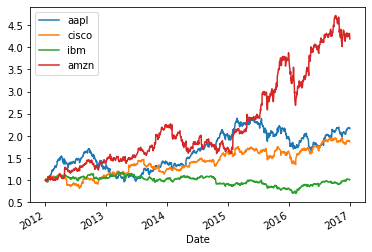

In [9]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot();

In [10]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


**Logarithmic returns vs. Arithmetic returns**

In [13]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


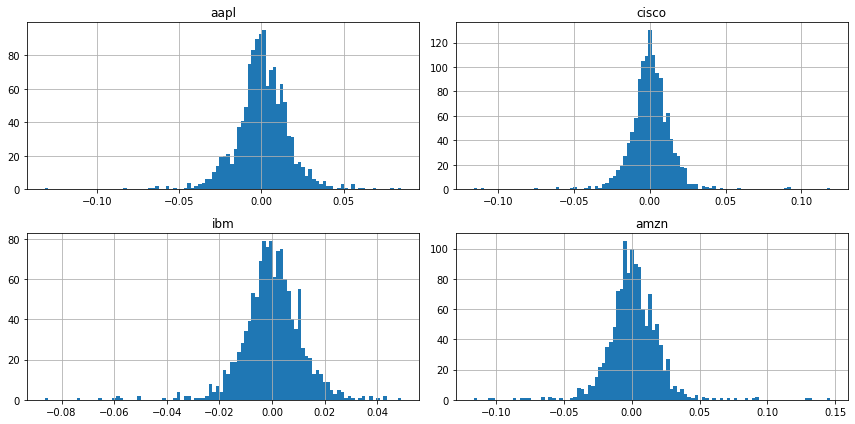

In [44]:
log_ret.hist(bins=100,figsize=(12,6))
plt.tight_layout();

In [15]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
aapl,1257.0,0.000614,0.016466,-0.131875,-0.007358,0.000455,0.009724,0.085022
cisco,1257.0,0.000497,0.014279,-0.116091,-0.006240,0.000213,0.007634,0.118862
ibm,1257.0,0.000011,0.011819,-0.086419,-0.005873,0.000049,0.006477,0.049130
amzn,1257.0,0.001139,0.019362,-0.116503,-0.008534,0.000563,0.011407,0.146225


In [16]:
log_ret.mean() * 252

aapl     0.154803
cisco    0.125291
ibm      0.002788
amzn     0.287153
dtype: float64

In [17]:
log_ret.cov()

,aapl,cisco,ibm,amzn
aapl,0.000271,0.000071,0.000057,0.000075
cisco,0.000071,0.000204,0.000072,0.000079
ibm,0.000057,0.000072,0.000140,0.000059
amzn,0.000075,0.000079,0.000059,0.000375


In [18]:
log_ret.cov()*252

,aapl,cisco,ibm,amzn
aapl,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


**random distribution**

In [19]:
# Règlage du seed (optionnel)
np.random.seed(101)

# Colonnes d'actions (Stocks)
print('Stocks')
print(stocks.columns)
print('\n')

# Créer des poids aléatoires
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)
print('\n')

# Re-pondération des Poids
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Rendement attendu ou escompté
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# variance attendue ou escomptée
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Ratio de Sharpe
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)


Stocks
Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]


Rebalance to sum to 1.0
[0.40122278 0.44338777 0.02212343 0.13326603]


Expected Portfolio Return
0.1559927204963251


Expected Volatility
0.18502649565908932


Sharpe Ratio
0.8430831483926559


In [20]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Créer des poids aléatoires
    weights = np.array(np.random.random(4))

    # (re)Pondération des poids
    weights = weights / np.sum(weights)

    # Sauvegarde des Poids
    all_weights[ind,:] = weights

    # rendement attendu
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # variance Attendue
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Ratio de Sharpe
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [21]:
sharpe_arr.max()

1.0303260551271316

In [22]:
sharpe_arr.argmax()

1419

In [23]:
all_weights[1419,:]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

In [24]:
max_sr_ret = ret_arr[1419]
max_sr_vol = vol_arr[1419]

**Plot data**

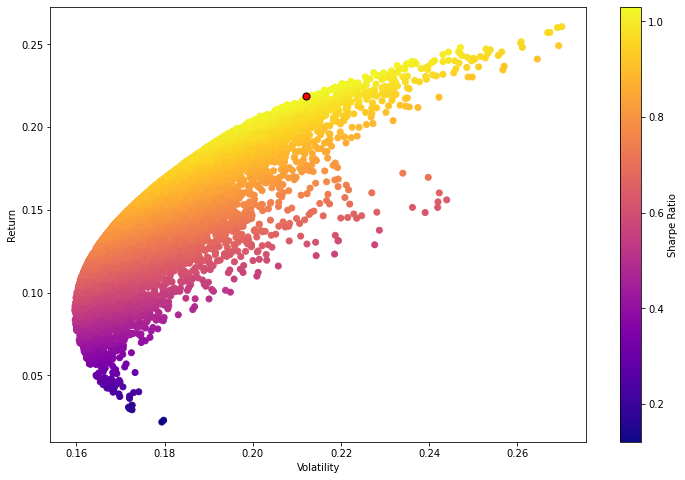

In [26]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
# Ajouter un point rouge pour le SR max
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black');

## Mathematical optimization

In [27]:
def get_ret_vol_sr(weights):
    """
    Prends en argument les poids, retourne un tableau de rendement,
    volatilité et Ratio de Sharpe
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [28]:
from scipy.optimize import minimize

In [29]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is a 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where ``n`` is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see he

In [30]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [31]:
def check_sum(weights):
    '''
    Retourne 0 si la somme des poids vaut 1.0
    '''
    return np.sum(weights) - 1

In [32]:
cons = ({'type':'eq','fun': check_sum})

In [33]:
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

In [34]:
init_guess = [0.25,0.25,0.25,0.25]

In [35]:
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [36]:
opt_results

     fun: -1.030716870335817
     jac: array([ 5.64306974e-05,  4.18424606e-05,  3.39921713e-01, -4.44948673e-05])
 message: 'Optimization terminated successfully'
    nfev: 35
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([2.66289769e-01, 2.04189820e-01, 1.49043917e-16, 5.29520412e-01])

In [37]:
opt_results.x

array([2.66289769e-01, 2.04189820e-01, 1.49043917e-16, 5.29520412e-01])

In [38]:
get_ret_vol_sr(opt_results.x)

array([0.21885916, 0.21233683, 1.03071687])

## Optimal Portfolios (Efficient Frontier)

In [39]:
frontier_y = np.linspace(0,0.3,100)

In [40]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1]

In [41]:
frontier_volatility = []

for possible_return in frontier_y:
    # contraintes
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})

    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

    frontier_volatility.append(result['fun'])

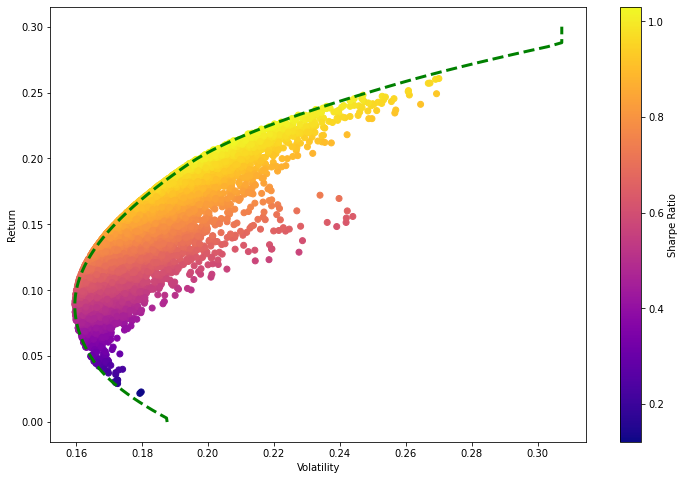

In [43]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Ajouter une ligne de frontière
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3);